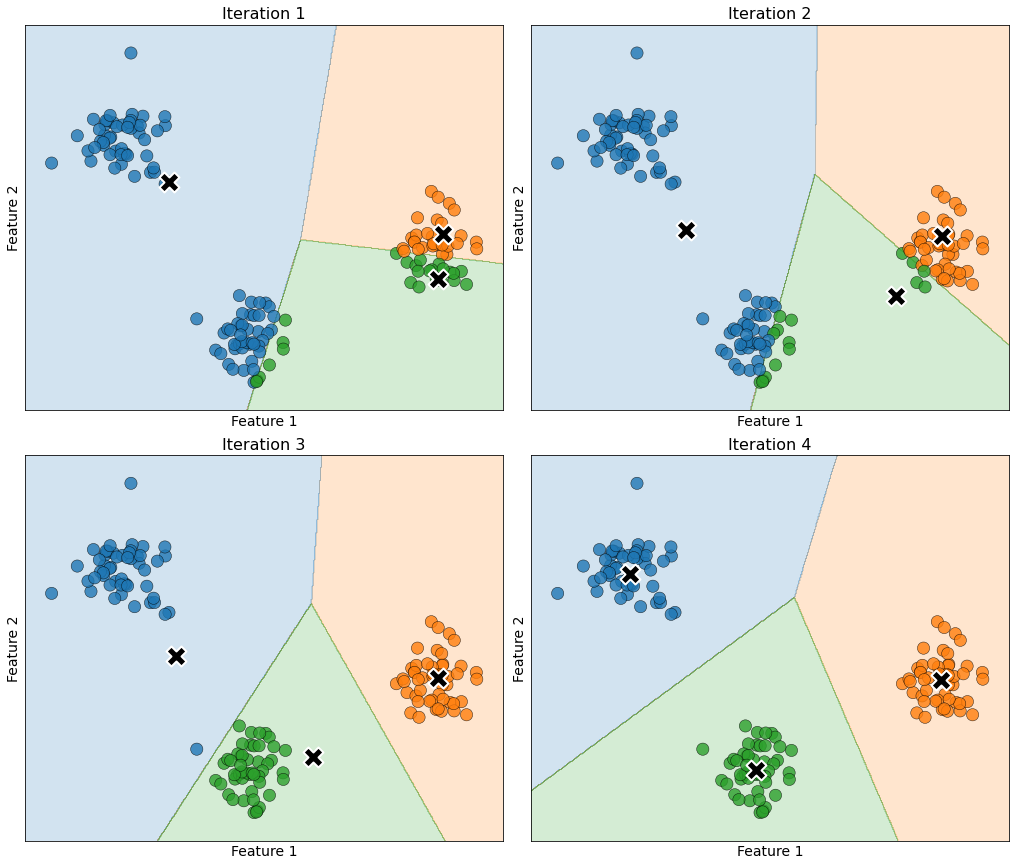

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(42)

# 1. Generate synthetic 2D data with more defined and separable clusters
n_samples = 150
blob_centers = [(0, 0), (7, 3), (-5, 7)]
std_dev = 0.8  # Reduce the spread of points around the centers

X = []
for cx, cy in blob_centers:
    points = np.random.randn(n_samples // len(blob_centers), 2) * std_dev + np.array([cx, cy])
    X.append(points)
X = np.vstack(X)

# Shuffle the dataset
np.random.shuffle(X)

# 2. Choose the number of clusters and initialize centroids randomly
k = 3
initial_centroid_indices = np.random.choice(len(X), k, replace=False)
centroids = X[initial_centroid_indices, :]

# Update font sizes globally
plt.rcParams.update({
    "font.size": 14,  # General font size
    "axes.titlesize": 16,  # Title font size
    "axes.labelsize": 14,  # Axis label font size
    "xtick.labelsize": 12,  # X-tick label font size
    "ytick.labelsize": 12,  # Y-tick label font size
    "legend.fontsize": 12,  # Legend font size
})

# Function to plot clusters in a 2x2 grid
def plot_clusters_in_2x2(X, centroids_history, labels_history):
    """
    Plot clustering results across 4 iterations in a 2x2 grid with enhanced text.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 12), constrained_layout=True)
    cmap = ListedColormap(["#1f77b4", "#ff7f0e", "#2ca02c"])  # Smooth custom colors

    # Define grid for region overlay
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    for idx, ax in enumerate(axes.ravel()):
        if idx >= len(centroids_history):  # In case fewer iterations are available
            ax.axis('off')
            continue

        centroids = centroids_history[idx]
        labels = labels_history[idx]

        # Calculate cluster regions
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        grid_distances = np.zeros((len(grid_points), k))
        for j in range(k):
            grid_distances[:, j] = np.linalg.norm(grid_points - centroids[j], axis=1)
        grid_labels = np.argmin(grid_distances, axis=1).reshape(xx.shape)

        # Plot cluster regions
        ax.contourf(xx, yy, grid_labels, cmap=cmap, alpha=0.2)

        # Plot data points
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=150, cmap=cmap, alpha=0.8, edgecolor='k', linewidth=0.5)

        # Plot centroids
        ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=400, marker='X', edgecolor='white', linewidth=2)
        
        # Set title
        ax.set_title(f"Iteration {idx+1}")

        # Add axis labels
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        
        # Remove axis numbers (keep ticks for structure)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.suptitle("", fontsize=20, fontweight='bold')
    plt.show()

# Perform K-means and store history for plotting
max_iterations = 4  # Limit to 4 iterations
centroids_history = []
labels_history = []

for iteration in range(max_iterations):
    # Store current centroids
    centroids_history.append(centroids.copy())
    
    # 3. Assign each point to the nearest centroid
    distances = np.zeros((len(X), k))
    for i in range(k):
        distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
    labels = np.argmin(distances, axis=1)
    labels_history.append(labels)
    
    # 4. Update centroid positions
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    
    # Check for convergence
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Plot only the first 4 iterations in a 2x2 grid
plot_clusters_in_2x2(X, centroids_history, labels_history)
